# Deep Learning
## Practice Projects
# P3: Parts of Speech
## Step 0. Style and Libraries

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;} 
h2, h3 {color: slategray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #ccc;}
h4 {color: #348ABD; font-family: 'Orbitron';}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: slategrey;}                        
</style>
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: #348ABD; background: aliceblue; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>                  


In [13]:
hide_code = ''
import numpy 
import pandas

import pylab as plt
from matplotlib import cm
import seaborn
%matplotlib inline

## Step 1. Load and Explore the Data

In [3]:
hide_code
# Read the data
data = pandas.read_csv('data/parts_of_speech.csv')
data.head()

,sentences,parts_of_speech
0,археологи находят в славянских землях много кл...,существительное глагол предлог прилагательное ...
1,но главной составляющей магмы является окись к...,союз прилагательное существительное существите...
2,понаблюдайте за своими товарищами во время дис...,глагол предлог местоимение существительное пре...
3,в тех комнатах мебель закрыта была чехлами,предлог местоимение существительное существите...
4,в определённых случаях существование такой зав...,предлог прилагательное существительное существ...


In [4]:
hide_code
# Create an array from words
words = numpy.array([sentence.split() for sentence in data['sentences']])
words = words.reshape(words.shape[0]*words.shape[1])
words[:20]

array(['археологи', 'находят', 'в', 'славянских', 'землях', 'много',
       'кладов', 'но', 'главной', 'составляющей', 'магмы', 'является',
       'окись', 'кремния', 'понаблюдайте', 'за', 'своими', 'товарищами',
       'во', 'время'],
      dtype='<U14')

In [5]:
hide_code
# Create an array from parts of speech
parts_of_speech = numpy.array([sentence.split() for sentence in data['parts_of_speech']])
parts_of_speech = parts_of_speech.reshape(parts_of_speech.shape[0]*parts_of_speech.shape[1])
parts_of_speech[:20]

array(['существительное', 'глагол', 'предлог', 'прилагательное',
       'существительное', 'числительное', 'существительное', 'союз',
       'прилагательное', 'существительное', 'существительное', 'глагол',
       'существительное', 'существительное', 'глагол', 'предлог',
       'местоимение', 'существительное', 'предлог', 'существительное'],
      dtype='<U15')

In [6]:
hide_code
# Display statistics
print('Dataset Statistics')
print('Number of sentences: {}'.format(len(data['sentences'])))
print('Number of words: {}'.format(len(words)))
print('Parts of speech:', set(parts_of_speech))

Dataset Statistics
Number of sentences: 60
Number of words: 420
Parts of speech: {'союз', 'причастие', 'местоимение', 'деепричастие', 'глагол', 'существительное', 'наречие', 'частица', 'числительное', 'прилагательное', 'предлог'}


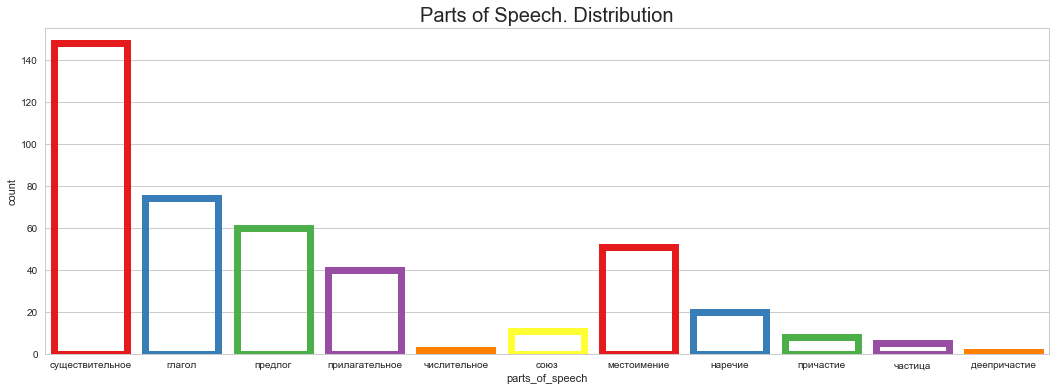

In [16]:
hide_code
# Create the dataframe
df = pandas.DataFrame({'parts_of_speech': parts_of_speech,
                       'words': words})
# Plot distribution
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
seaborn.countplot(x="parts_of_speech", data=df,
                  facecolor=(0, 0, 0, 0), linewidth=7,
                  edgecolor=seaborn.color_palette("Set1"))
plt.title('Parts of Speech. Distribution', fontsize=20);